# 1. Definition / Introduction
A **Random Forest**  is an ensemble (*gr. of items who perform as a whole*) supervised machine learning method used for **classification, regression, and other tasks** that operates by constructing a multitude (*large no.*) of decision trees at training time.

**Random Forest** creates
* decision trees on the given data samples,
* gets prediction from each tree and
* selects the best solution by means of voting.

**Random forest algorithm** combines multiple decision-trees, resulting in a forest of trees, hence the name **Random Forest.**

#### In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

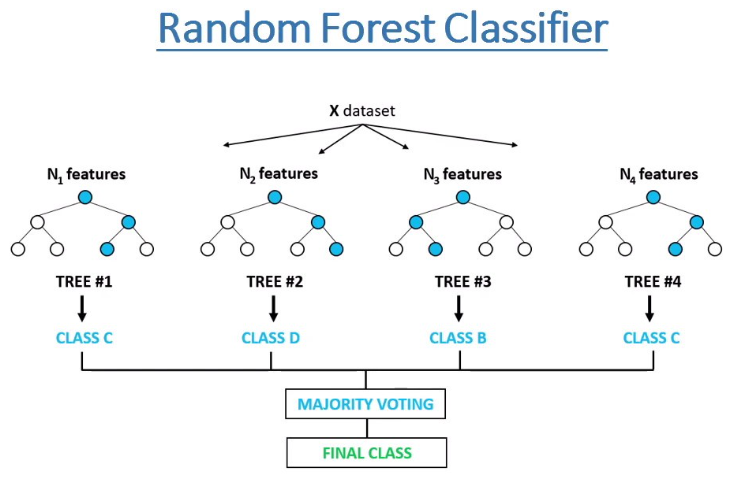

**Thanks to:**
* [Random Forest Classifier Tutorial](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial)

In [1]:
# install the category_encoders library
!pip install category_encoders

# 2. Import libraries

In [2]:
import numpy as np              # required for linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization
                                # split dataset into train and test set.
from sklearn.model_selection import train_test_split as split

%matplotlib inline

In [3]:
# import a way to issue warning messages.
import warnings
# ignore or suppress all warnings.
warnings.filterwarnings('ignore')

# 3. Load dataset
#### Car Evaluation Database
here the model evaluates cars according to the following concept structure:

- CAR, car acceptability<br>
-PRICE, overall price<br>
-buying, buying price<br>
-maint, price of the maintenance<br>
-TECH, technical characteristics<br>
-COMFORT, comfortable<br>
-doors, number of doors<br>
-persons, capacity in terms of persons to carry<br>
-lug_boot, the size of luggage boot<br>
-safety, estimated safety of the car<br>

#### Input attributes
are printed in lowercase. Besides the target concept **(CAR),** the model includes three intermediate concepts:
- PRICE,
-TECH,
-COMFORT.

Every concept is in the original model related to its lower level descendants by a set of examples.


The **Car Evaluation Database** contains examples with the structural information removed, i.e., directly relates **CAR** to the six input attributes:

- buying,
- maint,
- doors,
- persons,
- lug_boot,
- safety.
<br>

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

#### Attribute Information:

* **Class Values:** unacc, acc, good, vgood

#### Attributes:
* **buying:** vhigh, high, med, low.
* **maint:** vhigh, high, med, low.
* **doors:** 2, 3, 4, 5, more.
* **persons:** 2, 4, more.
* **lug_boot:** small, med, big.
* **safety:** low, med, high.

In [4]:
# data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
data = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_14_Random_Forest_Classifier/ML_14_rfc_car_evaluation.csv"

df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 4. Exploratory data analysis (EDA)

## 4.1 Shape matrix (rows & columns) of dataset

In [5]:
# view dimensions of dataset
df.shape

(1728, 7)

## 4.2 Missing values in variables (dataset)


In [6]:
# Check if any column contains null values
null_columns = df.isnull().any()
print("\nAny nulls in columns:\n", null_columns)

# Check if any row contains null values
null_rows = df.isnull().any(axis=1)
print("\nAny nulls in rows:\n", null_rows)

# Check if any value in the entire DataFrame is null
any_null = df.isnull().values.any()
print("\nAny nulls in DataFrame:", any_null)

# check missing values in variables
null_sum = df.isnull().sum()
print("\nMissing values in variables:\n", null_sum)


Any nulls in columns:
 0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

Any nulls in rows:
 0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

Any nulls in DataFrame: False

Missing values in variables:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


## 4.3 Rename features (column) names
We can see that the dataset does not have proper column names. The columns are merely labelled as 0, 1, 2.... and so on. We should give proper names to the columns.

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
# frequency distribution of values and counts of categorical variables
# col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print("\nFrequency distribution of variable %s:" % col)
    print(df[col].value_counts())


Frequency distribution of variable buying:
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Frequency distribution of variable maint:
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Frequency distribution of variable doors:
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Frequency distribution of variable persons:
persons
2       576
4       576
more    576
Name: count, dtype: int64

Frequency distribution of variable lug_boot:
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Frequency distribution of variable safety:
safety
low     576
med     576
high    576
Name: count, dtype: int64

Frequency distribution of variable class:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


## 4.4 Explore target class variable

In [11]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

We can see that the **doors** and **persons** are **categorical** in nature.

## Summary of variables
* There are **7 variables** in the dataset. All the variables are of categorical data type.
* These are given by **buying, maint, doors, persons, lug_boot, safety and class.**
* **class** is the **target** variable.

# 5. Stripping the feature vector (independent) and target (dependent) variable

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

# 6. Split data into separate training and test set

In [13]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size = 0.33, random_state = 42)

## 6.1 Shape of train and test dataset

In [14]:
# check the shape of X_train and X_test
print("\nShape matrix (rows and columns) of training dataset :\n", X_train.shape)
print("\nShape matrix (rows and columns) of test dataset :\n", X_test.shape)
# X_train.shape, X_test.shape


Shape matrix (rows and columns) of training dataset :
 (1157, 6)

Shape matrix (rows and columns) of test dataset :
 (571, 6)


# 7. Feature Engineering
**Feature Engineering** is the process of transforming raw data into useful features that help to understand the model in better way and increase its predictive power.

## 7.1 Feature engineering on different types of variables, by checking the data types of variables.

In [15]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## 7.2 Encode categorical variables
Encoding categorical variables refers to the process of converting categorical data (*data that can be divided into distinct groups*) into a numerical format that can be used by machine learning algorithms. Since most machine learning algorithms require numerical input, categorical variables must be transformed to numerical values.

In [16]:
# import category encoders
import category_encoders as ce

In [17]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


**buying:**
- vhigh - 1
- high  - 2
- low   - 3
- med   - 4

**maint:**
- vhigh - 1
- high  - 2
- low   - 3
- med   - 4



In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# 8. Build Random Forest Classifier model with default parameters

#### **y_test** are the true class labels and
#### **y_pred** are the predicted class labels in the **test-set.**

In [20]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# train (fit) the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print('\nModel accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9457


## 8.1 Random Forest Classifier model with **`n_estimators=10`**